# Workshop # 10 - Hierachical Clustering

In [12]:
#Import Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:

df = pd.read_csv("titanic-train.csv")

df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
df2 = df.loc[:,['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch']]
df2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [15]:
print('Age missing ', df2['Age'].isnull().sum())
print('PClass missing ', df2['Pclass'].isnull().sum())
print('SibSp missing ', df2['SibSp'].isnull().sum())
print('Parch missing ', df2['Parch'].isnull().sum())
print('Survived missing ', df2['Survived'].isnull().sum())

Age missing  177
PClass missing  0
SibSp missing  0
Parch missing  0
Survived missing  0


In [16]:
df2['Age'] = df2['Age'].fillna(df2['Age'].mean())

print('Age missing ', df2['Age'].isnull().sum())

Age missing  0


In [17]:
df2.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch'], dtype='object')

In [18]:
df3 = pd.get_dummies(df2)
df3.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male
0,0,3,22.0,1,0,0,1
1,1,1,38.0,1,0,1,0
2,1,3,26.0,0,0,1,0
3,1,1,35.0,1,0,1,0
4,0,3,35.0,0,0,0,1


In [19]:
x = df3.iloc[:,1:7]
x.head()

,Pclass,Age,SibSp,Parch,Sex_female,Sex_male
0,3,22.0,1,0,0,1
1,1,38.0,1,0,1,0
2,3,26.0,0,0,1,0
3,1,35.0,1,0,1,0
4,3,35.0,0,0,0,1


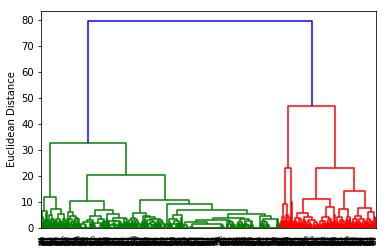

In [21]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

clusters = linkage(x, 
                   metric='euclidean',
                   method='complete')

dendr = dendrogram(clusters)

plt.ylabel('Euclidean Distance');

In [22]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete')

prediction = ac.fit_predict(x)
print('Cluster labels: %s\n' % prediction)

Cluster labels: [1 0 1 0 0 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 1 1 1 1
 1 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1
 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0
 0 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 1 0 0
 1 1 1 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0
 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 1 1
 1 1 1 0 1 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 0 1 1 1 1
 1 0 0 1 

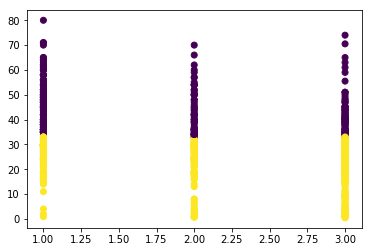

In [24]:
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=prediction);